In [4]:
import matplotlib.pyplot as plt
# Import pandas with alias pd
import pandas as pd

# 1. Intro to Pandas Dataframes

After completing this chapter, you will be able to:

- Describe the key characteristics of pandas dataframes.
- Import tabular data from .csv files into pandas dataframes.
- Run calculations and summarize data in pandas dataframes.
- Select data in pandas dataframes.

Pandas dataframes are composed of rows and columns that can have header names, and the columns.

By default, each row has an index within a range of values beginning at [0]. However, the row index in pandas dataframes can also be set as labels (e.g. a location name, date).

In addition to selecting cells through location-based indexing (e.g. cell at row 1, column 1), you can also query for data within pandas dataframes based on specific values (e.g. querying for specific text strings or numeric values).

Because of the tabular structure, you can work with cells in pandas dataframes:
- across an entire row
- across an entire column (or series, a one-dimensional array in pandas)
- by selecting cells based on location or specific values

Due to its inherent tabular structure, pandas dataframes also allow for cells to have null values (i.e. no data value such as blank space, NaN, -999, etc).

#### Tabular Structure of Pandas Dataframes

# Dataframe with 2 columns and 2 rows
dataframe = pd.DataFrame(columns=["column_1", "column_2"],
                         data=[
                              [value_column_1, value_column_2],  
                              [value_column_1, value_column_2]
                         ])

In [5]:
# Average monthly precip for Boulder, CO
avg_monthly_precip = pd.DataFrame(columns=["month", "precip_in"],
                                  data=[
                                       ["Jan", 0.70],  ["Feb", 0.75],
                                       ["Mar", 1.85],  ["Apr", 2.93],
                                       ["May", 3.05],  ["June", 2.02],
                                       ["July", 1.93], ["Aug", 1.62],
                                       ["Sept", 1.84], ["Oct", 1.31],
                                       ["Nov", 1.39],  ["Dec", 0.84]
])

# Notice the nicely formatted output without use of print
avg_monthly_precip

,month,precip_in
0,Jan,0.70
1,Feb,0.75
2,Mar,1.85
3,Apr,2.93
4,May,3.05
5,June,2.02
6,July,1.93
7,Aug,1.62
8,Sept,1.84
9,Oct,1.31


### A Quick Plot
You can plot pandas dataframe using matplotlib or using the pandas .plot() method which wraps around matplotlib.

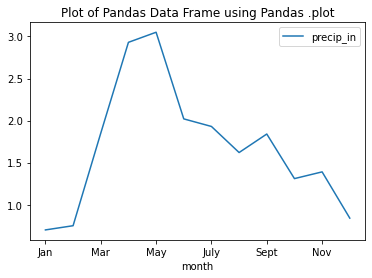

In [6]:
f, ax = plt.subplots()
avg_monthly_precip.plot(x="month",
                        y="precip_in",
                        title="Plot of Pandas Data Frame using Pandas .plot",
                        ax=ax)
plt.show()

Or you can plot using the standard matplotlib approach. In this course we will encourage you to use the matplotlib approach which will be more flexible as you begin to create more complex plots.

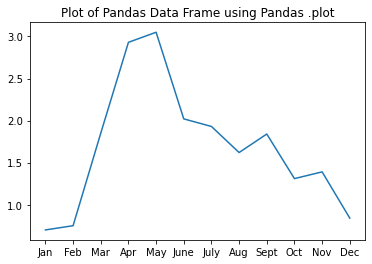

In [7]:
f, ax = plt.subplots()
ax.plot(avg_monthly_precip.month,
        avg_monthly_precip.precip_in)

ax.set(title="Plot of Pandas Data Frame using Pandas .plot")
plt.show()

# 2. Import CSV Files Into Pandas Dataframes


Import tabular data from .csv files into pandas dataframes.

In [8]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

In [9]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file from URL
et.data.get_data(url=avg_monthly_precip_url)

'C:\\Users\\34639\\earth-analytics\\data\\earthpy-downloads\\avg-precip-months-seasons.csv'

In [10]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 
                      "earth-analytics", 
                      "data"))

In [11]:
# Import data from .csv file
fname = os.path.join("earthpy-downloads",
                     "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


# Challenge 1: Plot a DataFrame

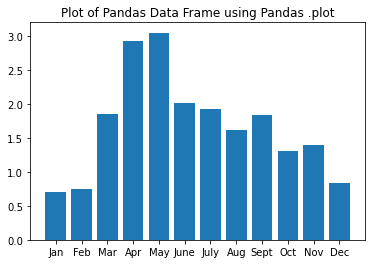

In [14]:
f, ax = plt.subplots()
ax.bar(x = avg_monthly_precip.months,
        height = avg_monthly_precip.precip)

ax.set(title="Plot of Pandas Data Frame using Pandas .plot")
plt.show()

# 3. Run Calculations and Summary Statistics on Pandas Dataframes

After completing this page, you will be able to:

- View and sort data in pandas dataframes.
- Run calculations and summary statistics (e.g. mean, minimum, maximum) on columns in pandas dataframes.

## Review of Methods and Attributes in Python

In [15]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

In [16]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file
et.data.get_data(url=avg_monthly_precip_url)

'C:\\Users\\34639\\earth-analytics\\data\\earthpy-downloads\\avg-precip-months-seasons.csv'

In [17]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [18]:
# Import data from .csv file
fname = os.path.join("earthpy-downloads",
                     "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In [19]:
# See last 5 rows
avg_monthly_precip.tail()

,months,precip,seasons
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall
10,Nov,1.39,Fall
11,Dec,0.84,Winter


#### Describe Contents of Pandas Dataframes

In [20]:
# Information about the dataframe
avg_monthly_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


In [21]:
# Get column names
avg_monthly_precip.columns

Index(['months', 'precip', 'seasons'], dtype='object')

### Run Summary Statistics on Numeric Values in Pandas Dataframes

In [22]:
# Summary stats of all numeric columns
avg_monthly_precip.describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000



You can also run other summary statistics that are not included in describe() such as .median(), .sum(), etc, which provide the output in a pandas series (i.e. a one-dimensional array for pandas).

In [23]:
# Median of all numeric columns
avg_monthly_precip.median()

precip    1.73
dtype: float64

#### Run Summary Statistics on Individual Columns
You can also run .describe() on individual columns in a pandas dataframe using:

#### dataframe[["column_name"]].describe()

In [24]:
# Summary stats on precip column as dataframe
avg_monthly_precip[["precip"]].describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


Using a single set of brackets (e.g. dataframe["column_name"].describe()) selects the column as a pandas series (a one-dimensional array of the column) and thus, the output is also provided as a pandas series.

In [25]:
# Summary stats on precip column as series
avg_monthly_precip["precip"].describe()

count    12.000000
mean      1.685833
std       0.764383
min       0.700000
25%       1.192500
50%       1.730000
75%       1.952500
max       3.050000
Name: precip, dtype: float64

## Sort Data Values in Pandas Dataframes
Recall that in the lessons on numpy arrays, you can easily identify the minimum or maximum value, but not the month in which that value occurred. This is because the individual numpy arrays for precip and months were not connected in an easy way that would allow you to determine the month that matches the values.

Using pandas dataframes, you can sort the values with the method .sort_values(), which takes as input:

- the name of the column to sort
- a Boolean value of True or False for the parameter ascending

#### dataframe.sort_values(by="column_name", ascending = True)

In [26]:
# Sort in descending order for precip
avg_monthly_precip.sort_values(by="precip",
                               ascending=False)

,months,precip,seasons
4,May,3.05,Spring
3,Apr,2.93,Spring
5,June,2.02,Summer
6,July,1.93,Summer
2,Mar,1.85,Spring
8,Sept,1.84,Fall
7,Aug,1.62,Summer
10,Nov,1.39,Fall
9,Oct,1.31,Fall
11,Dec,0.84,Winter


### Run Calculations on Columns Within Pandas Dataframes

You can run mathematical calculations on columns within pandas dataframes using any mathematical calculation and assignment operator such as:

#### dataframe["column_name"] *= 25.4

In [27]:
# Convert values from inches to millimeters
avg_monthly_precip["precip"] *= 25.4

avg_monthly_precip

,months,precip,seasons
0,Jan,17.780,Winter
1,Feb,19.050,Winter
2,Mar,46.990,Spring
3,Apr,74.422,Spring
4,May,77.470,Spring
5,June,51.308,Summer
6,July,49.022,Summer
7,Aug,41.148,Summer
8,Sept,46.736,Fall
9,Oct,33.274,Fall


You can also easily replace or create a new column within a pandas dataframe using mathematical calculations on itself or other columns such as:

#### dataframe["column_name_2"] = dataframe["column_name_1"] / 25.4

In [28]:
# Create new column with precip in the original units (inches)
avg_monthly_precip["precip_in"] = avg_monthly_precip["precip"] / 25.4

avg_monthly_precip

,months,precip,seasons,precip_in
0,Jan,17.780,Winter,0.70
1,Feb,19.050,Winter,0.75
2,Mar,46.990,Spring,1.85
3,Apr,74.422,Spring,2.93
4,May,77.470,Spring,3.05
5,June,51.308,Summer,2.02
6,July,49.022,Summer,1.93
7,Aug,41.148,Summer,1.62
8,Sept,46.736,Fall,1.84
9,Oct,33.274,Fall,1.31


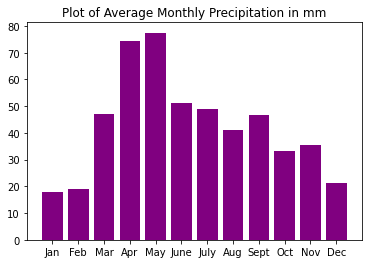

In [29]:
# Plot the data
f, ax = plt.subplots()

ax.bar(x=avg_monthly_precip.months,
       height=avg_monthly_precip.precip,
       color="purple")

ax.set(title="Plot of Average Monthly Precipitation in mm")
plt.show()

### Group Values in Pandas Dataframes

#### dataframe.groupby(['label_column'])[["value_column"]].method()

In [30]:
# Group data by seasons and summarize precip
precip_by_season=avg_monthly_precip.groupby(["seasons"])[["precip"]].describe()
precip_by_season

precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [31]:
# Drop a level so there is only one index
precip_by_season.columns = precip_by_season.columns.droplevel(0)
precip_by_season

,count,mean,std,min,25%,50%,75%,max
seasons,,,,,,,,
Fall,3.0,38.438667,7.257173,33.274,34.290,35.306,41.021,46.736
Spring,3.0,66.294000,16.787075,46.990,60.706,74.422,75.946,77.470
Summer,3.0,47.159333,5.329967,41.148,45.085,49.022,50.165,51.308
Winter,3.0,19.388667,1.802028,17.780,18.415,19.050,20.193,21.336


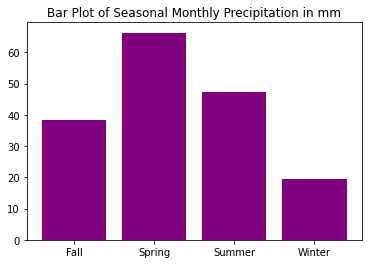

In [32]:
# Plot the data
f, ax = plt.subplots()

ax.bar(precip_by_season.index,
        precip_by_season["mean"],
        color="purple")

ax.set(title="Bar Plot of Seasonal Monthly Precipitation in mm")
plt.show()

In addition to running .describe() using a groupby, you can also run individual statistics such as:

- .count() to get the number of rows belonging to a specific group (e.g. season)
- other summary statistics such as .median(), .sum(), .mean(), etc, to calculate these summary statistics by a chosen group

In [34]:
# Save median of precip for each season to dataframe
avg_monthly_precip_median = avg_monthly_precip.groupby(["seasons"])[["precip"]].median()

avg_monthly_precip_median

,precip
seasons,
Fall,35.306
Spring,74.422
Summer,49.022
Winter,19.050


In [35]:
avg_monthly_precip_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Fall to Winter
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   precip  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


 index is now the season names, which means that seasons is no longer a column.

To avoid setting a new index when running summary statistics such as median(), you can add a Boolean value of False for the parameter as_index of groupby() to keep the original index.

In [36]:
# Save to new dataframe with original index
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"], as_index=False)[["precip"]].median()

avg_monthly_precip_median

,seasons,precip
0,Fall,35.306
1,Spring,74.422
2,Summer,49.022
3,Winter,19.050


## Reset Index of Pandas Dataframes
You can also easily reset the index of any dataframe back to a range index (i.e. starting at [0]) as needed using the syntax:

#### dataframe.reset_index(inplace=True)

The inplace=True tells the method reset_index to replace the named dataframe with the reset. Running this syntax on any dataframe will reset the index to a range index (i.e. starting at [0]).

In the example below, the index is reset back to a range index starting at [0], rather than using the season name.

In [37]:
# Save summary stats of precip for each season to dataframe
avg_monthly_precip_stats = avg_monthly_precip.groupby(
    ["seasons"])[["precip"]].describe()

avg_monthly_precip_stats

precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [38]:
# Reset index
avg_monthly_precip_stats.reset_index(inplace=True)

avg_monthly_precip_stats

seasons precip                                                              
           count       mean        std     min     25%     50%     75%     max
0    Fall    3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
1  Spring    3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
2  Summer    3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
3  Winter    3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

# 4. Select Data From Pandas Dataframes

After completing this page, you will be able to:

- Explain indexing for pandas dataframes.
- Use indexing and filtering to select data from pandas dataframes.

### Indexing and Selections From Pandas Dataframes
There are two kinds of indexing in pandas dataframes:

- location-based and
- label-based.

You can use location-based indexing to query pandas dataframes using the attribute .iloc and providing the row and column selection as ranges (i.e. start and stop locations along the rows and columns). Just like with numpy arrays, the range provided is inclusive of the first value, but not the second value.

In [40]:
#### dataframe.iloc[0:1, 0:1]

### Label-based Indexing
Pandas dataframes can also be queried using label-based indexing.

For example, you can create an index from a specific column of values, and then use the attribute .loc to select data from the pandas dataframes using a value that is found in that index.

In [42]:
#dataframe.set_index("column")
#dataframe.loc[[value]]

###  Filtering Data Values
In addition to using indexing, you can also select or filter data from pandas dataframes by querying for values that met a certain criteria.

In [43]:
# dataframe[dataframe["column"] == value]

---

In [44]:
# Import packages
import os

import pandas as pd
import earthpy as et

In [45]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file
et.data.get_data(url=avg_monthly_precip_url)

'C:\\Users\\34639\\earth-analytics\\data\\earthpy-downloads\\avg-precip-months-seasons.csv'

In [46]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [47]:
# Import data from .csv file
fname = os.path.join("data", "earthpy-downloads", 
                     "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


## Select Data Using Location Index (.iloc)
You can use .iloc to select individual rows and columns or a series of rows and columns by providing the range (i.e. start and stop locations along the rows and columns) that you want to select.

Recall that in Python indexing begins with [0] and that the range you provide is inclusive of the first value, but not the second value.

This means that you can use dataframe.iloc[0:1, 0:1] to select the cell value at the intersection of the first row and first column of the dataframe.

In [50]:
# Select first row and first column
avg_monthly_precip.iloc[0:1, 0:1] #row col

,months
0,Jan


You can expand the range for either the row index or column index to select more data.

For example, you can select the first two rows of the first column using dataframe.iloc[0:2, 0:1] or the first columns of the first row using dataframe.iloc[0:1, 0:2].

In [51]:
# Select first two rows and first column
avg_monthly_precip.iloc[0:2, 0:1] #row col

,months
0,Jan
1,Feb


In [52]:
# Select first row and first two columns
avg_monthly_precip.iloc[0:1, 0:2] #row col

,months,precip
0,Jan,0.7


For example, you can use dataframe.iloc[0:1, :] to select the first row of a dataframe and all of the columns, or dataframe.iloc[ :, 0:1] to select the first column of a dataframe and all of the rows.

In [53]:
# Select first row with all columns
avg_monthly_precip.iloc[0:1, :]#row col

,months,precip,seasons
0,Jan,0.7,Winter


In [55]:
# Select first column with all rows
avg_monthly_precip.iloc[:, 0:1] # row col

,months
0,Jan
1,Feb
2,Mar
3,Apr
4,May
5,June
6,July
7,Aug
8,Sept
9,Oct


### Select Data Using Label Index (.loc)
In addition to selecting data based on location, you can also select data based on labels.

To do this, you first create a new index using a column of values that you want to use for organizing and querying your data.

For example, you can create an index from a specific column of values using:

#### dataframe.set_index("column")



In [56]:
# Create new dataframe with `months` as index
avg_monthly_precip_index = avg_monthly_precip.set_index("months")

avg_monthly_precip_index

,precip,seasons
months,,
Jan,0.70,Winter
Feb,0.75,Winter
Mar,1.85,Spring
Apr,2.93,Spring
May,3.05,Spring
June,2.02,Summer
July,1.93,Summer
Aug,1.62,Summer
Sept,1.84,Fall


In [57]:
# Select Aug using months index 
avg_monthly_precip_index.loc[["Aug"]]

,precip,seasons
months,,
Aug,1.62,Summer


### Select Data Using Columns
In addition to location-based and label-based indexing, you can also select data from pandas dataframes by selecting entire columns using the column names.

For example, you can select all data from a specific column in a pandas dataframe using:

- dataframe["column"]

which provides the data from the column as a pandas series, which is a one-dimensional array. A pandas series is useful for selecting columns for plotting using matplotlib.

In [58]:
# Select the `months` column as series
avg_monthly_precip["months"]

0      Jan
1      Feb
2      Mar
3      Apr
4      May
5     June
6     July
7      Aug
8     Sept
9      Oct
10     Nov
11     Dec
Name: months, dtype: object

You can also specify that you want an output that is also a pandas dataframe using:

- dataframe[["column"]]

which includes a second set of brackets [] to indicate that the output should be a pandas dataframe.

In [59]:
# Select the `months` column as dataframe
avg_monthly_precip[["months"]]

,months
0,Jan
1,Feb
2,Mar
3,Apr
4,May
5,June
6,July
7,Aug
8,Sept
9,Oct


In [60]:
# Save months and seasons to new dataframe
avg_monthly_precip_text = avg_monthly_precip[['months', 'seasons']]

avg_monthly_precip_text

,months,seasons
0,Jan,Winter
1,Feb,Winter
2,Mar,Spring
3,Apr,Spring
4,May,Spring
5,June,Summer
6,July,Summer
7,Aug,Summer
8,Sept,Fall
9,Oct,Fall


### ilter Data Using Specific Values
In addition to location-based and label-based indexing, you can select or filter data based on specific values within a column using:

#### dataframe[dataframe["column"] == value]

This will return all rows containing that value within the specified column.

If you are selecting data using a text string column, you need to provide the value within quotations (e.g. "text").

For example, you can select all rows that have a seasons value of Summer.

In [62]:
# Select rows with Summer in seasons
avg_monthly_precip[avg_monthly_precip.seasons == "Summer"]

,months,precip,seasons
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer


In [63]:
# Select rows with Jan in months
jan_avg_precip = avg_monthly_precip[avg_monthly_precip["months"] == "Jan"]

jan_avg_precip

,months,precip,seasons
0,Jan,0.7,Winter


In [64]:
# Select rows equal to 1.62 in precip
avg_monthly_precip[avg_monthly_precip["precip"] == 1.62]

,months,precip,seasons
7,Aug,1.62,Summer


In [65]:
# Save rows with values greater than 2.0 to new dataframe
gt2_avg_monthly_precip = avg_monthly_precip[avg_monthly_precip["precip"] > 2.0]

gt2_avg_monthly_precip

,months,precip,seasons
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer


## Practice Your Pandas Dataframes Skills

1_Review how to download and import data files into pandas dataframe, using precip-2002-2013-months-seasons.csv which is available for download at “https://ndownloader.figshare.com/files/12710621”.
This file contains two columns of average monthly precipitation values: one for 2002 and one for 2013.

In [67]:
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710621"

# Download file
et.data.get_data(url=avg_monthly_precip_url)

'C:\\Users\\34639\\earth-analytics\\data\\earthpy-downloads\\precip-2002-2013-months-seasons.csv'

In [68]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [70]:
# Import data from .csv file
fname = os.path.join("data", "earthpy-downloads", 
                     "precip-2002-2013-months-seasons.csv")

pp_02_13 = pd.read_csv(fname)
pp_02_13

,months,precip_2002,precip_2013,seasons
0,Jan,1.07,0.27,Winter
1,Feb,0.44,1.13,Winter
2,Mar,1.50,1.72,Spring
3,Apr,0.20,4.14,Spring
4,May,3.20,2.66,Spring
5,June,1.18,0.61,Summer
6,July,0.09,1.03,Summer
7,Aug,1.44,1.40,Summer
8,Sept,1.52,18.16,Fall
9,Oct,2.44,2.24,Fall


2_Use the .describe() method to summarize the precipitation values in the dataframe (e.g. precip_2002_2013). Note the maximum values in 2002 and 2013.


In [71]:
pp_02_13.describe()

,precip_2002,precip_2013
count,12.000000,12.000000
mean,1.156667,2.845833
std,0.961101,4.953130
min,0.020000,0.270000
25%,0.380000,0.582500
50%,1.125000,1.265000
75%,1.505000,2.345000
max,3.200000,18.160000


In [72]:
pp_02_13.max()

months           Sept
precip_2002       3.2
precip_2013     18.16
seasons        Winter
dtype: object

3_Use indexing to create two new dataframes:
- one containing the month with the maximum value in 2002
- one containing the month with the maximum value in 2013

In [76]:
 pp_02_13

,months,precip_2002,precip_2013,seasons
0,Jan,1.07,0.27,Winter
1,Feb,0.44,1.13,Winter
2,Mar,1.50,1.72,Spring
3,Apr,0.20,4.14,Spring
4,May,3.20,2.66,Spring
5,June,1.18,0.61,Summer
6,July,0.09,1.03,Summer
7,Aug,1.44,1.40,Summer
8,Sept,1.52,18.16,Fall
9,Oct,2.44,2.24,Fall


In [77]:
pp_02 = pp_02_13.iloc[:, 0:2]

In [78]:
pp_02

,months,precip_2002
0,Jan,1.07
1,Feb,0.44
2,Mar,1.50
3,Apr,0.20
4,May,3.20
5,June,1.18
6,July,0.09
7,Aug,1.44
8,Sept,1.52
9,Oct,2.44


In [81]:
pp_13 = pp_02_13[['months', 'precip_2013']]
pp_13

,months,precip_2013
0,Jan,0.27
1,Feb,1.13
2,Mar,1.72
3,Apr,4.14
4,May,2.66
5,June,0.61
6,July,1.03
7,Aug,1.40
8,Sept,18.16
9,Oct,2.24


4_Using the columns for months and the precipitation for 2013, create plot of Average Monthly Precipitation in 2013 for Boulder, CO.

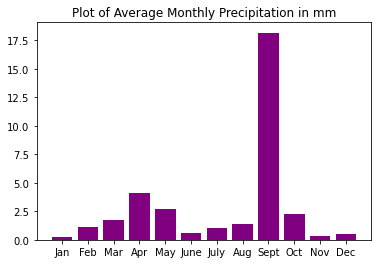

In [82]:
# Plot the data
f, ax = plt.subplots()

ax.bar(x=pp_13.months,
       height=pp_13.precip_2013,
       color="purple")

ax.set(title="Plot of Average Monthly Precipitation in mm")
plt.show()

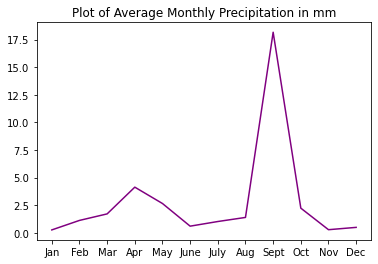

In [83]:
# Plot the data
f, ax = plt.subplots()

ax.plot(pp_13.months,
      pp_13.precip_2013,
       color="purple")

ax.set(title="Plot of Average Monthly Precipitation in mm")
plt.show()